In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Imports

### After getting the import's, we will load the dataset

# 2. Data Wrangling

In [4]:
data = pd.read_csv('/Users/kerman/Documents/Data Science/Datasets/Titanic/train.csv')
test = pd.read_csv('/Users/kerman/Documents/Data Science/Datasets/Titanic/test.csv') #Here we will predict.

In [5]:
data.shape

(891, 12)

In [6]:
test.shape 

(418, 11)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we see, the 'PassengerId' is the same as the index, so we will change the index to 'PassengerId?

In [8]:
data.set_index(['PassengerId'], inplace = True)
data.head()
#Just run once, the second time will display an error

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Now the data is loaded, we will get rid of the data
Before that, we will follow the steps to adecuate the data. 

    1. Know the types of the data.
    2. Describe the data.

In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### As we see, there are some missing values, so we will get rid of it.

    
 1. Identify it
 2. Deal with it
 3. Correct data format (if it neccesary)
    

### 1.Identify it
 In this dataset, the missing values are marked by the default value of NaN, in other cases, we will need the .replace(example , np.nan, inplace = True) function for replacing the missing example to NaN

In [10]:
missing_data = data.isnull()

In [11]:
missing_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False


#### This is a preview of the missing data, the True value means that there's no data
But? How much data is missing? 

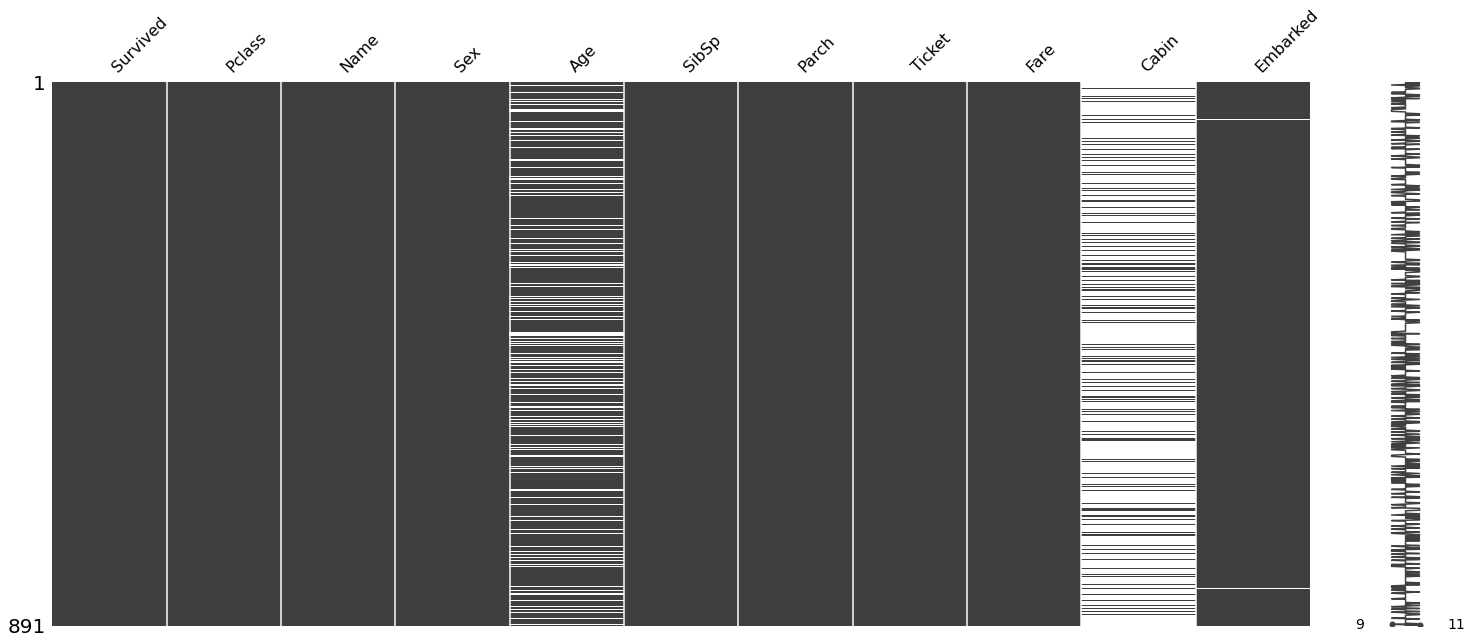

In [12]:
import missingno as mn
mn.matrix(data)

#### As we see, there's a bunch of missing data, specially on Cabin

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [14]:
#Easy mode to display the quantity of missing data:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

So, here we have a resume of the missing data, as said before, false means that there's some data, and true means that there's not. 

There are:
   1. All id's are identify
   2. All survival data is colected
   3. All names
   4. All genders
   5. 177 values of Age are missing
   6. All sibilings on board is colected.
   7. All the parch
   8. All the tickets.
   9. 687 values of cabin missing
   10. 2 unknow values of the place of embarking

### 2. Deal with the missing data

Now we know the missing data, time to deal with it, so, there are two ways to approach this situation, one is to drop it, the second one, to replace it, in this case the bunch of data is little in some cases, so we will replace.

In [15]:
#We will replace the missing values of the age by using the mean.
avg_age = data['Age'].mean ()
avg_age

29.69911764705882

In [16]:
data['Age'].replace(np.nan, avg_age,inplace = True)

In [17]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
#Now we will fill the two missing values of 'Embarked', using the most common place. Using the method idxmax()
data['Embarked'].value_counts().idxmax()

'S'

In [19]:
data['Embarked'].replace(np.nan,'S',inplace = True)

In [20]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [21]:
#The cabin info is to low, so we will drop that feature from the table.
data.drop(['Cabin'],axis = 1,inplace = True)

In [22]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Now all the missing values are cleaned, let's check one more time

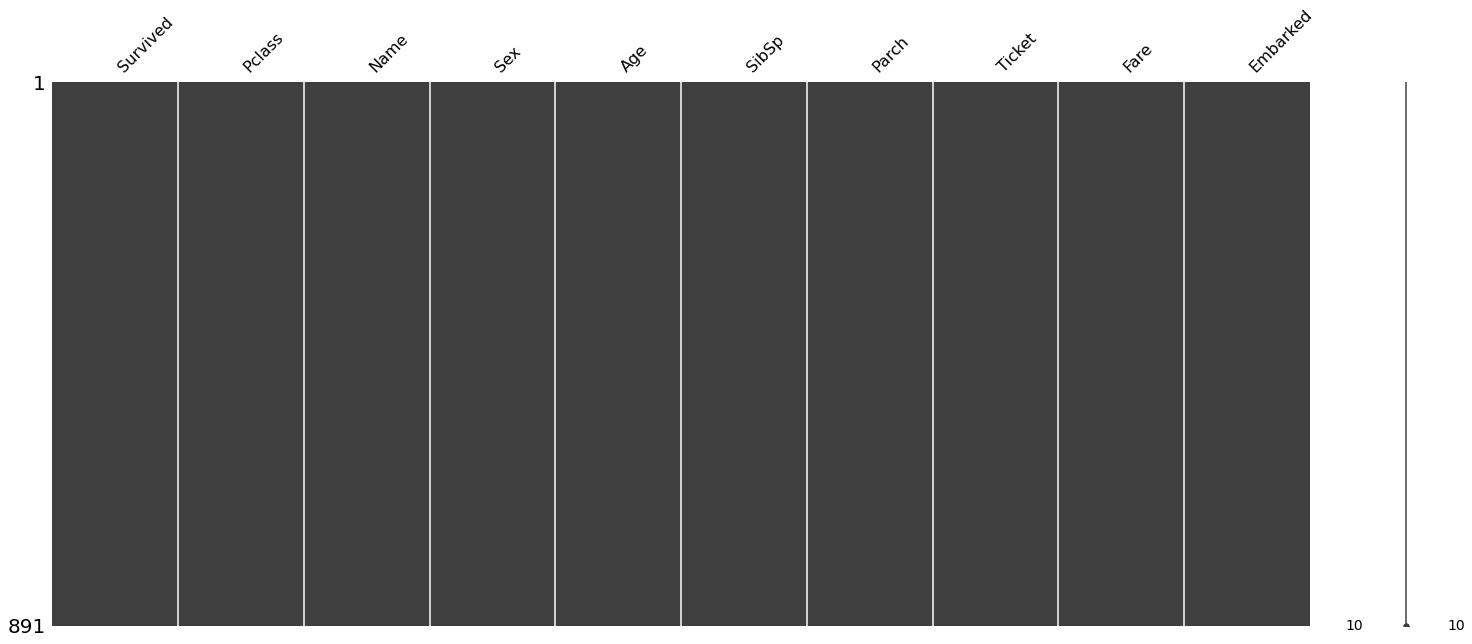

In [23]:
mn.matrix(data)

### 3. Correct the data format

In [24]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

As we see, the type sex should be changed to int type, representing 0 the female and 1 the male

In [25]:
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


### 4. Data normalization

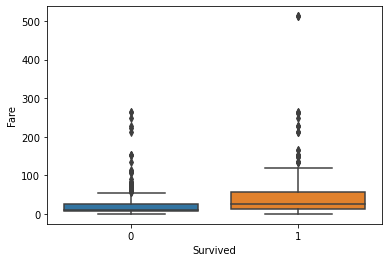

In [26]:
#Remove the outliners
import seaborn as sns
sns.boxplot(x = 'Survived', y = 'Fare', data = data)

In [27]:
#As we see, there's an outiler, so we will remove it


# 3. Exploratory Data Analysis

EDA is used for seeing the data can tell us beyond the formal modeling

In [28]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
#This is the co-relation table, here will appear the correlation between features.
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [30]:
data.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

From here, we can take some 'little' supossitions about the data. For example, there's a relation between sex, the class and survival.

In [31]:
data.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.415100,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.549778,0.473684,0.464912,48.395408


In [32]:
data.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
1,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


We will display the relation between gender and survival

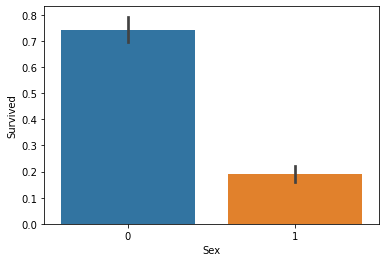

In [33]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

As supossed, the female's and the kids were a preffeence during the sinking.
Now we will check the relation between the class and the survival rate.

In [34]:
data.groupby('Pclass').mean()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,0.564815,37.048118,0.416667,0.356481,84.154687
2,0.472826,0.586957,29.866958,0.402174,0.380435,20.662183
3,0.242363,0.706721,26.403259,0.615071,0.393075,13.675550


In [35]:
import scipy
pearson,p = scipy.stats.pearsonr(data['Sex'],data['Survived'])
print(pearson)
print(p)
 

-0.5433513806577552
1.406066130878715e-69


There's some negative relationship with a strong certainment between sex and survival

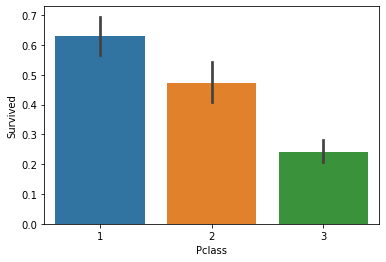

In [36]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

In [37]:
pearson,p = scipy.stats.pearsonr(data['Pclass'],data['Survived'])
print(pearson)
print(p)

-0.3384810359610153
2.537047387978631e-25


As obvious, the first class passengers where more likely to survive

### Now we will check the relation between the age and the survival rate

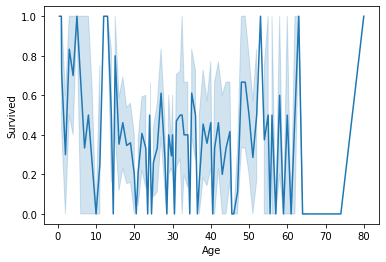

In [38]:
sns.lineplot(x="Age", y="Survived", data=data)

## Model Development
The objetive of this proyect is to predict the survival or not with given certain values, so before studying the data, is time to develop a prediction algorithm. In this case, we have a classification problem, where each row can survive (1) or no (0)